### MSEplots on PYPI: pip install MSEplots-pkg
----------
msed_plots(pressure,temperature,mixing_ratio,h0_std,ensemble_size,ent_rate,entrain=Flase)<br>
    - pressure: vertical profile of pressure, array-like <br>
    - temperature: vertical profile of temperature, array-like <br>
    - specific humidity: vertical profile of specific humidity, array-like
    - h0_std: standard deviation for mse variations at the surface, default=2000 [Joule/kg]
    - ensemble_size: size of mse variations, default=20
    - ent_rate: entrainment scale, default=np.range(0,2,0.05) [1/km]
    - entrain: switch for displaying profiles of entrained parcels, default=False

In [1]:
import numpy as np
from siphon.simplewebservice.wyoming import WyomingUpperAir
from datetime import datetime
from MSEplots import plots as mpt
#from MSEplots/plots.py import plots as mpt     #doesn't work, would be useful for development

In [2]:
# reading data prociding vertical profiles of T, Td, pressure and height
date = datetime(2018, 11, 10, 0)
station = 'MFL'

df = WyomingUpperAir.request_data(date, station)
pressure = df['pressure'].values 
Temp = df['temperature'].values 
Temp_dew = df['dewpoint'].values 
altitude = df['height'].values 

from metpy.calc.thermo import *
from metpy.units import units
q = mixing_ratio(saturation_vapor_pressure(Temp_dew*units.degC),pressure*units.mbar)
q = specific_humidity_from_mixing_ratio(q)

/Users/bem/Jupyter/MSEplot/MSEplots-pkg_MetpyDependent/MSEplots/plots.py:184: RuntimeWarning: overflow encountered in exp
  M = np.exp(eps * (altitude-altitude[0])).to('dimensionless')


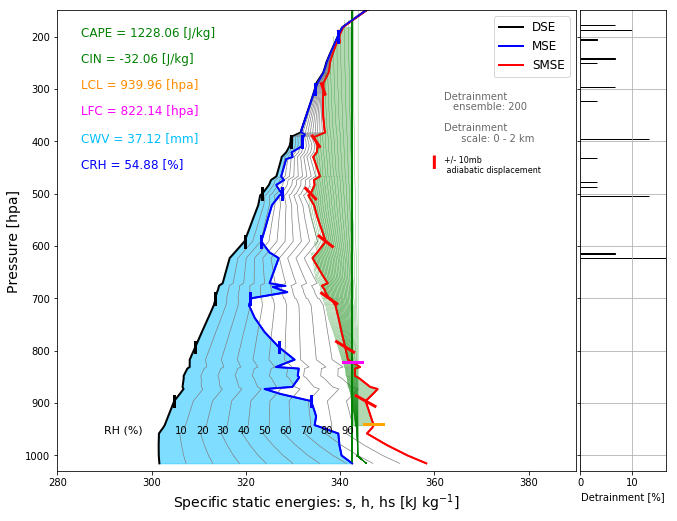

In [3]:
ax = mpt.msed_plots(pressure, Temp ,q , h0_std=2000, ensemble_size=1, ent_rate=np.arange(0,2,0.01), entrain=True)
# mpt.add_RCEREF(ax, cooling=-2,heatflux=180)
# mpt.add_curves_Wyoming(ax, datetime(2018,11,10,12),'MFL',linewidth=1.0)